In [63]:
#=======================================================================================
# Importing the libaries:
#=======================================================================================
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

In [64]:
#=======================================================================================
# Importing the data:
#=======================================================================================

def read_data():
    train_data = pd.read_csv("./train.csv")
    print("Train data imported successfully!!")
    print("-"*50)
    test_data = pd.read_csv("./test.csv")
    print("Test data imported successfully!!")
    return train_data , test_data

In [65]:
train_data , test_data = read_data()

Train data imported successfully!!
--------------------------------------------------
Test data imported successfully!!


In [66]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [67]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


That's an interesting PassengerId .. maybe we can use it ..


In [68]:
print(train_data.columns.values)

['PassengerId' 'HomePlanet' 'CryoSleep' 'Cabin' 'Destination' 'Age' 'VIP'
 'RoomService' 'FoodCourt' 'ShoppingMall' 'Spa' 'VRDeck' 'Name'
 'Transported']


In [69]:
train_data.info()
print("-"*50)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (tot

Transported feature is object, I will convert it to int for visualization step.

In [70]:
train_data["Transported"] = train_data["Transported"].astype("int")

In [71]:
print("Train data shape = " , train_data.shape)
print("Test data shape = " , test_data.shape)

Train data shape =  (8693, 14)
Test data shape =  (4277, 13)


In [72]:
print("Missed Data in train data:")
print(train_data.isnull().sum())
print("-" * 50)
print("Missed Data in test data:")
test_data.isnull().sum()

Missed Data in train data:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
--------------------------------------------------
Missed Data in test data:


PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

There are a lot of missed data .. we are going to process them in the data processing step.

In [73]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [74]:
train_data.describe(include = ["O"])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [75]:
# saving the test ids:
Test_Id = test_data.PassengerId

In [76]:
combine = [train_data , test_data]


for dataset in combine:
    
    # =======================================================================
    # Extract Passenger Group:
    # =======================================================================

    dataset["PassengerGroup"] = dataset["PassengerId"].str.split('_' , expand = True)[1].astype(int).astype(str)
    dataset.drop(columns = ["PassengerId"] , inplace = True)
    # =======================================================================
    # Extract Cabin num, deck, side:
    # =======================================================================

    dataset["deck"] = (dataset.Cabin.str.split('/' , expand = True))[0]
    dataset["num"] = np.nan_to_num(dataset.Cabin.str.split('/', expand = True)[1].astype(float)).astype(int)
    dataset["side"] = dataset.Cabin.str.split('/', expand = True)[2]
    dataset.drop(columns = ["Cabin"] , inplace = True)
    
print(f"Available decks are ({train_data.deck.unique().shape[0]} decks): {train_data.deck.unique()}")
print(f"Available nums are ({train_data.num.unique().shape[0]} nums): {train_data.num.unique()}")
print(f"Available sides are ({train_data.side.unique().shape[0]} sides): {train_data.side.unique()}")

Available decks are (9 decks): ['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
Available nums are (1817 nums): [   0    1    2 ... 1892 1893 1894]
Available sides are (3 sides): ['P' 'S' nan]


# EDA





In [77]:
# Helper functions:
# ====================================================================
def survived_bar_plot(feature , ax = None , font_scale = 0.8):
    sns.set(font_scale=font_scale)  
    data = train_data[[feature, "Transported"]].groupby([feature], as_index=False).mean().sort_values(by='Transported', ascending=False)
    plot = sns.barplot(data = data , x = feature , y = "Transported" ,ci=None , ax = ax )
    plot.set_title(f"{feature} Vs Transported")
    plot.set(xlabel=None)
    plot.set(ylabel=None)
    sns.set(font_scale=font_scale)  
    plot.bar_label(plot.containers[0],fmt='%.2f')
# ====================================================================

def survived_table(feature):
    return train_data[[feature, "Transported"]].groupby([feature], as_index=False).mean().sort_values(by='Transported', ascending=False).style.background_gradient(low=0.75,high=1)
def survived_hist_plot(feature , bin_width = 5):
    plt.figure(figsize = (6,4))
    sns.histplot(data = train_data , x = feature , hue = "Transported",binwidth=bin_width,palette = sns.color_palette(["yellow" , "green"]) ,multiple = "stack" ).set_title(f"{feature} Vs Transported")
    plt.show()

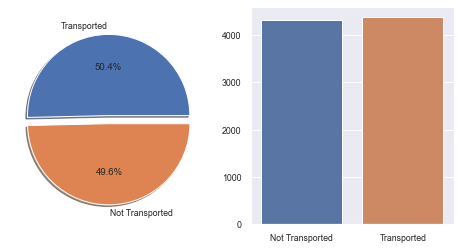

In [78]:
# ===================================================================
# Count of Transported Passengers:
# ===================================================================
f,ax=plt.subplots(1,2,figsize=(8,4))
train_data['Transported'].replace({0:"Not Transported",1:"Transported"}).value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sns.countplot(x = train_data["Transported"].replace({0:"Not Transported",1:"Transported"}) , ax = ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('')
plt.show()

There are approximately equal number of transported and non-transported passengers.

<a class = "anchor" id = "cat_with_tar">
</a>
<div style="color:black;
           border-radius:0px;
           background-color:#00ADB5;
           font-size:14px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 6px;
              color:white;">
            <b>Categorical features with target:</b>
        </p>
</div>


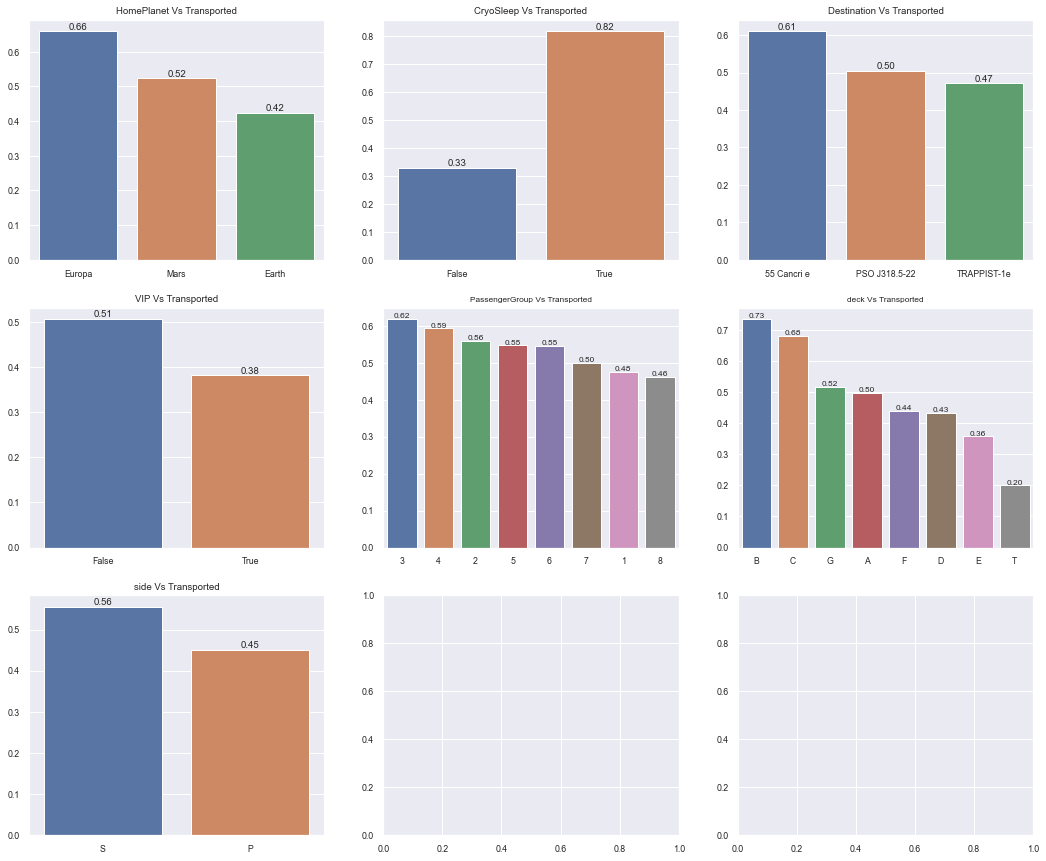

In [79]:
fig , ax = plt.subplots(3,3 , figsize=(18 , 15))
survived_bar_plot("HomePlanet" , ax[0][0])
survived_bar_plot('CryoSleep' , ax[0][1])
survived_bar_plot('Destination' , ax[0][2])
survived_bar_plot('VIP'  , ax[1][0])
survived_bar_plot('PassengerGroup' , ax[1][1] , font_scale=0.7)
survived_bar_plot('deck' , ax[1][2],font_scale=0.7)
survived_bar_plot('side' , ax[2][0])


<a class = "anchor" id = "num_with_tar">
    <div style="color:black;
               border-radius:0px;
               background-color:#00ADB5;
               font-size:14px;
               font-family:sans-serif;
               letter-spacing:0.5px">
            <p style="padding: 6px;
                  color:white;">
                <b>Numerical features with target:</b>
            </p>
    </div>                          
</a>



**1 ) Age:**

**Note:** This plot is a stack plot.

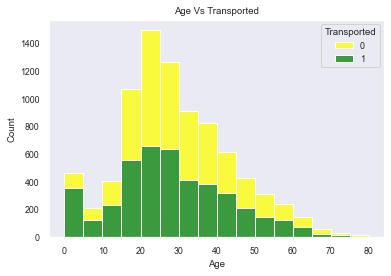

In [80]:
sns.set_style("dark") # to remove the grid.
survived_hist_plot("Age") 

children below 10 years old age are most common to be Transported. I am going to make is_child in Data Engineering step.

**2 ) RoomService, FoodCourt, ShoppingMall, Spa, VrDeck:**

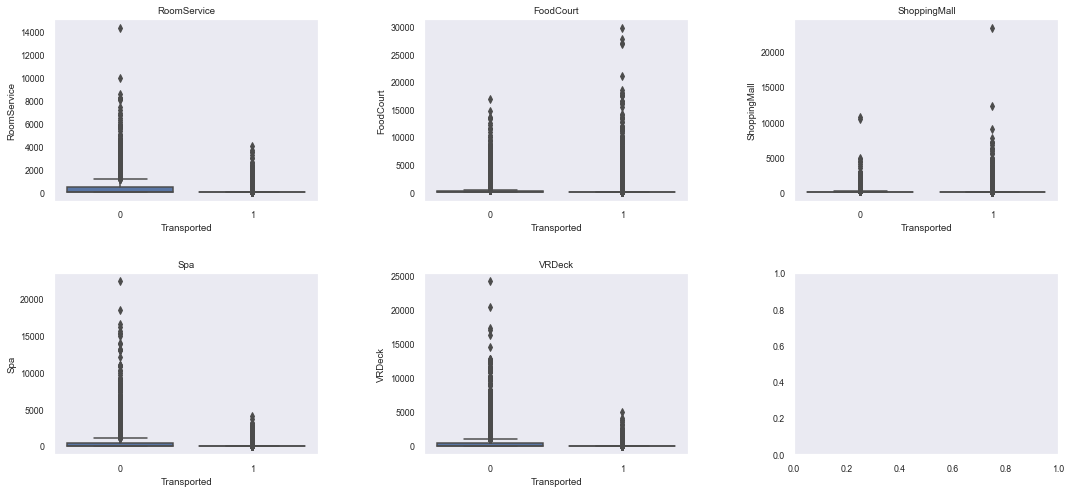

In [81]:
plot , ax = plt.subplots(2 , 3, figsize = (18,8))
sns.boxplot(data = train_data , x = "Transported" , y = "RoomService" , ax = ax[0][0]).set_title("RoomService")
sns.boxplot(data = train_data , x = "Transported" , y = "FoodCourt" , ax = ax[0][1]).set_title("FoodCourt")
sns.boxplot(data = train_data , x = "Transported" , y = "ShoppingMall" , ax = ax[0][2]).set_title("ShoppingMall")
sns.boxplot(data = train_data , x = "Transported" , y = "Spa" , ax = ax[1][0]).set_title("Spa")
sns.boxplot(data = train_data , x = "Transported" , y = "VRDeck" , ax = ax[1][1]).set_title("VRDeck")
plt.subplots_adjust(wspace=0.4,hspace=0.4)

As we saw above, The most values of these features is 0. and There are many outliers.

<a class = "anchor" id = "num_features">

<div style="color:black;
           border-radius:0px;
           background-color:#00ADB5;
           font-size:14px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 6px;
              color:white;">
            <b>Correlation between numerical features:</b>
        </p>
</div>
</a>




<AxesSubplot:>

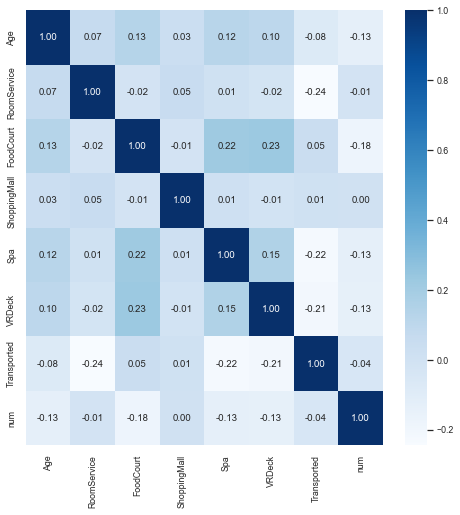

In [82]:
sns.set(font_scale=0.8)
plt.figure(figsize = (8,8))
sns.heatmap(train_data.corr(),annot=True,fmt='.2f',cmap="Blues")

insights:
- luxury features haves some positive correlation with each other.
- There are negtive correlation between luxury features and target feature.

<a class = "anchor" id = "cat_and_num"><div style="color:black;
           border-radius:0px;
           background-color:#00ADB5;
           font-size:14px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 6px;
              color:white;">
            <b>Correlation between numerical and categorical features:</b>
        </p>
</div></a>



**1 ) Age:**

<AxesSubplot:xlabel='VIP', ylabel='Age'>

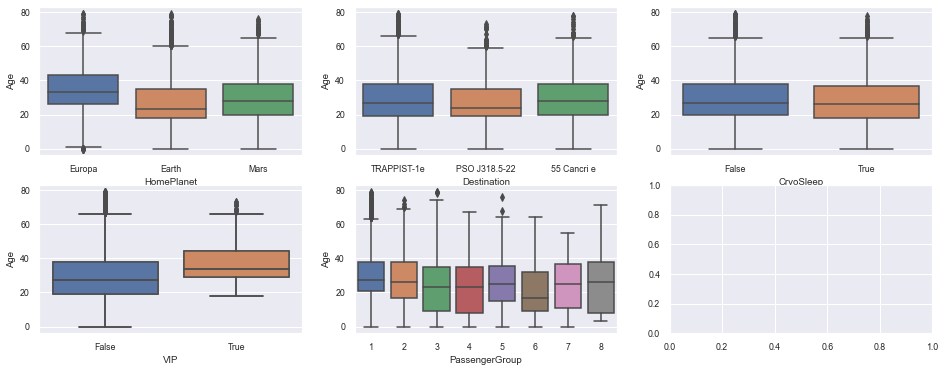

In [83]:
plot , ax  = plt.subplots(2,3 , figsize = (16,6))
sns.boxplot(data = train_data , y = "Age" , x = "HomePlanet"  , ax = ax[0][0])
sns.boxplot(data = train_data , y = "Age" , x = "Destination"  , ax = ax[0][1])
sns.boxplot(data = train_data , y = "Age" , x = "CryoSleep"  , ax = ax[0][2])
sns.boxplot(data = train_data , y = "Age" , x = "VIP"  , ax = ax[1][0])
sns.boxplot(data = train_data , y = "Age" , x = "PassengerGroup"  , ax = ax[1][1])
sns.boxplot(data = train_data , y = "Age" , x = "VIP"  , ax = ax[1][0])

from the plots above we can see that PassengerGroup is good to use for filling Age missed data.

<a href="#toc" role="button" aria-pressed="true" >Back to Table of Contents  ⬆️</a>

<a class = "anchor" id = "dp">
    
<div style="color:#00ADB5;
           display:fill;
           border-radius:5px;
           background-color:#393E46;
           font-size:20px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            <b> 4 ) Data Processing:</b>
        </p>
</div>
</a>




In [84]:
transported = train_data["Transported"]
all_data = pd.concat([train_data , test_data]).reset_index(drop = True)
all_data.drop(columns = ["Transported"] , inplace = True)

<a class = "anchor" id = "fmv"><div style="color:black;
           border-radius:0px;
           background-color:#00ADB5;
           font-size:14px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 6px;
              color:white;">
            <b>Filling Missed Values:</b>
        </p>
</div></a>



In [85]:
all_data.isnull().sum()

HomePlanet        288
CryoSleep         310
Destination       274
Age               270
VIP               296
RoomService       263
FoodCourt         289
ShoppingMall      306
Spa               284
VRDeck            268
Name              294
PassengerGroup      0
deck              299
num                 0
side              299
dtype: int64

In [86]:
# Filling HomePlanet, CryoSleep, Destination, VIP:
all_data["HomePlanet"] = all_data["HomePlanet"].fillna(all_data["HomePlanet"].mode()[0]) 
all_data["CryoSleep"] = all_data["CryoSleep"].fillna(all_data["CryoSleep"].mode()[0]) 
all_data["Destination"] = all_data["Destination"].fillna(all_data["Destination"].mode()[0]) 
all_data["VIP"] = all_data["VIP"].fillna(all_data["VIP"].mode()[0]) 

In [87]:
# Filling Age Feature by PassengerGroup:
PassengerGroups = ["1" , "2" , "3" , "4" , "5" , "6" , "7" , "8"]
median_ages = {}
for passengerGroup in PassengerGroups :
    median_ages[passengerGroup] = all_data.loc[all_data["PassengerGroup"] == passengerGroup , ["Age"]].median()

for index , passenger in all_data.iterrows():
    if pd.isna(passenger["Age"]):
        all_data.at[index , "Age"] = median_ages[passenger["PassengerGroup"]]

In [88]:
# Filling RoomService, FoodCourt, ShoppingMall, Spa, VRDeck:
all_data["RoomService"] = all_data["RoomService"].fillna(all_data["RoomService"].mode()[0]) 
all_data["FoodCourt"] = all_data["FoodCourt"].fillna(all_data["FoodCourt"].mode()[0]) 
all_data["ShoppingMall"] = all_data["ShoppingMall"].fillna(all_data["ShoppingMall"].mode()[0]) 
all_data["Spa"] = all_data["Spa"].fillna(all_data["Spa"].mode()[0]) 
all_data["VRDeck"] = all_data["VRDeck"].fillna(all_data["VRDeck"].mode()[0]) 

In [89]:
# Filling Cabin information:
all_data.deck = all_data.deck.fillna(all_data.deck.mode()[0])
all_data.num = all_data.num.fillna(all_data.num.mode()[0])
all_data.side = all_data.side.fillna(all_data.side.mode()[0])

In [90]:
# Filling Name feature:
all_data.Name = all_data.Name.fillna("None")

In [91]:
all_data.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
PassengerGroup    0
deck              0
num               0
side              0
dtype: int64

No More Missed Data !!

<a class = "anchor" id = "de"><div style="color:black;
           border-radius:0px;
           background-color:#00ADB5;
           font-size:14px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 6px;
              color:white;">
            <b>Data Engineering:</b>
        </p>
</div>
    </a>


**1 ) Family Size:**

In [92]:
all_data["LastName"] = all_data.Name.str.split(" ",expand = True)[1]
last_name_count = all_data.Name.str.split(" ",expand = True)[1].value_counts()
all_data["FamilySize"] = [last_name_count[x] if not pd.isna(x) else None for x in all_data["LastName"]]
all_data["FamilySize"] = all_data["FamilySize"].fillna(0)
all_data.drop(columns = ["LastName" , "Name"] , inplace = True)

**2 ) MoneySpent:**

In [93]:
all_data["MoneySpent"] = all_data["RoomService"] + all_data["FoodCourt"] + all_data["ShoppingMall"] + \
all_data["Spa"] + all_data["VRDeck"] 

**3 ) Spend Category:**

In [94]:
all_data['SpendCategory'] = ''
all_data.loc[all_data['MoneySpent'].between(0, 1, 'left'), 'SpendCategory'] = 'Zero_Spend'
all_data.loc[all_data['MoneySpent'].between(1, 800, 'both'), 'SpendCategory'] = 'Under_800'
all_data.loc[all_data['MoneySpent'].between(800, 1200, 'right'), 'SpendCategory'] = 'Median_1200'
all_data.loc[all_data['MoneySpent'].between(1200, 2700, 'right'), 'SpendCategory'] = 'Upper_2700'
all_data.loc[all_data['MoneySpent'].between(2700, 100000, 'right'), 'SpendCategory'] = 'Big_Spender'
all_data['SpendCategory'] = all_data['SpendCategory'].astype('category')

**4 ) Any_Spend:**

In [95]:
all_data["AnySpend"] = all_data["MoneySpent"] > 0

**5 ) Is Child:**

In [96]:
all_data["IsChild"] = all_data["Age"] <= 10

In [97]:
all_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroup,deck,num,side,FamilySize,MoneySpent,SpendCategory,AnySpend,IsChild
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,1,B,0,P,3.0,0.0,Zero_Spend,False,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,F,0,S,4.0,736.0,Under_800,True,False
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,1,A,0,S,7.0,10383.0,Big_Spender,True,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,2,A,0,S,7.0,5176.0,Big_Spender,True,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,F,1,S,9.0,1091.0,Median_1200,True,False


<a class = "anchor" id  = "prfortr">

<div style="color:black;
           border-radius:0px;
           background-color:#00ADB5;
           font-size:14px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 6px;
              color:white;">
            <b>Preparing for Training:</b>
        </p>
</div>


</a>




In [98]:
# =========================================================================
#  Converting Bool to Int
# =========================================================================

all_data["CryoSleep"] = all_data["CryoSleep"].astype(int)
all_data["VIP"] = all_data["VIP"].astype(int)
all_data["IsChild"] = all_data["IsChild"].astype(int)
all_data["FamilySize"] = all_data["FamilySize"].astype(int)
all_data["AnySpend"] = all_data["AnySpend"].astype(int)

In [99]:
all_data = pd.get_dummies(all_data)

In [100]:
all_data.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,num,FamilySize,MoneySpent,AnySpend,IsChild,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,PassengerGroup_1,PassengerGroup_2,PassengerGroup_3,PassengerGroup_4,PassengerGroup_5,PassengerGroup_6,PassengerGroup_7,PassengerGroup_8,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,side_S,SpendCategory_Big_Spender,SpendCategory_Median_1200,SpendCategory_Under_800,SpendCategory_Upper_2700,SpendCategory_Zero_Spend
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,3,0.0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,0,4,736.0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,7,10383.0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,7,5176.0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,9,1091.0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0


In [101]:
train_data = all_data[:len(train_data)]
test_data = all_data[len(train_data):]

<a href="#toc" role="button" aria-pressed="true" >Back to Table of Contents  ⬆️</a>


<a class = "anchor" id = "modeling">


<div style="color:#00ADB5;
           display:fill;
           border-radius:5px;
           background-color:#393E46;
           font-size:20px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            <b> 5 ) Modeling:</b>
        </p>
</div>



</a>






In [102]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from xgboost import XGBClassifier

In [103]:
# ==================================================================================
# Preparing Data For Training:
# ==================================================================================

Y_train = transported
X_train = train_data
X_test = test_data
print(f"X_train shape is = {X_train.shape}" )
print(f"Y_train shape is = {Y_train.shape}" )
print(f"Test shape is = {X_test.shape}" )

X_train shape is = (8693, 42)
Y_train shape is = (8693,)
Test shape is = (4277, 42)


In [104]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=12)

In [105]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

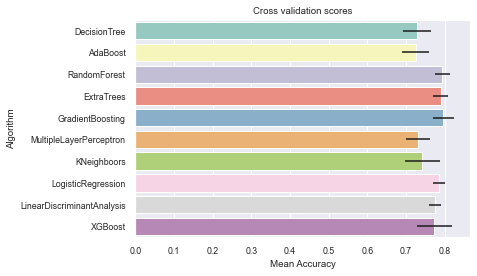

In [106]:
# Modeling step Test different algorithms 
# Modeling step Test different algorithms 
random_state = 2
classifiers = []
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier(random_state = random_state))
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression",
                                                                                      "LinearDiscriminantAnalysis" ,"XGBoost"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [107]:
results = pd.DataFrame({"Model" : ["DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression",
                                                                                      "LinearDiscriminantAnalysis" ,"XGBoost"],"Score" : cv_means , "Std" : cv_std})
results.sort_values("Score" , ascending = False)

,Model,Score,Std
4,GradientBoosting,0.796514,0.027979
2,RandomForest,0.793982,0.020305
3,ExtraTrees,0.789379,0.019352
7,LogisticRegression,0.785809,0.015459
8,LinearDiscriminantAnalysis,0.774648,0.015827
9,XGBoost,0.772593,0.045347
6,KNeighboors,0.742340,0.045064
5,MultipleLayerPerceptron,0.730931,0.031368
0,DecisionTree,0.728530,0.036931
1,AdaBoost,0.724962,0.034402


In [108]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier(random_state=random_state)

gb_param_grid = {
              'learning_rate': [0.01],
                "max_depth" : [14],
              'min_samples_leaf': [25],
              'max_features': [0.05] , 
                "n_estimators" : [600]
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=5, scoring="accuracy", verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

print("The best Model Parameters is :")
print(GBC_best)
print(f"With Cross Validation Score = {gsGBC.best_score_}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
The best Model Parameters is :
GradientBoostingClassifier(learning_rate=0.01, max_depth=14, max_features=0.05,
                           min_samples_leaf=25, n_estimators=600,
                           random_state=2)
With Cross Validation Score = 0.8009925945826835


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

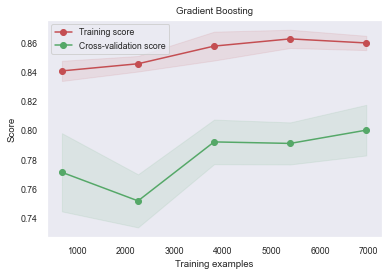

In [109]:
plot_learning_curve(GBC_best , "Gradient Boosting" , X_train , Y_train)

In [110]:
# RFC Parameters tunning 
RFC = RandomForestClassifier(random_state=random_state)

rf_param_grid = {"max_depth": [16],
              "max_features": [0.2],
              "min_samples_leaf": [15],
              "min_samples_split": [5],
              "bootstrap": [False],
              "n_estimators" :[560],
              "criterion": ["gini"]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=5, scoring="accuracy", verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

print("The best Model Parameters is :")
print(RFC_best)
print(f"With Cross Validation Score = {gsRFC.best_score_}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
The best Model Parameters is :
RandomForestClassifier(bootstrap=False, max_depth=16, max_features=0.2,
                       min_samples_leaf=15, min_samples_split=5,
                       n_estimators=560, random_state=2)
With Cross Validation Score = 0.7999575831248333


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

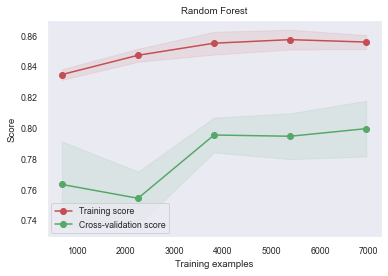

In [111]:
plot_learning_curve(RFC_best , "Random Forest" , X_train , Y_train)

In [112]:
#ExtraTrees 
ExtC = ExtraTreesClassifier(random_state=random_state)

## Search grid for optimal parameters
ex_param_grid = {"max_depth": [18],
              "max_features": [0.5],
              "min_samples_split": [5],
              "min_samples_leaf": [15],
              "bootstrap": [False],
              "n_estimators" :[550],
              "criterion": ["gini"],
                }

gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=5, scoring="accuracy", verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

print("The best Model Parameters is :")
print(ExtC_best)
print(f"With Cross Validation Score = {gsExtC.best_score_}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
The best Model Parameters is :
ExtraTreesClassifier(max_depth=18, max_features=0.5, min_samples_leaf=15,
                     min_samples_split=5, n_estimators=550, random_state=2)
With Cross Validation Score = 0.7978855088469954


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

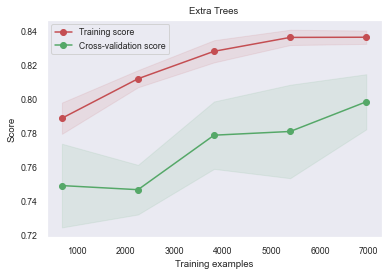

In [113]:
plot_learning_curve(ExtC_best , "Extra Trees" , X_train , Y_train)

In [114]:
# Logistic Regression: 
LogReg = LogisticRegression(random_state=random_state)

## Search grid for optimal parameters
log_reg_param_grid = {
"C":[0.005]   ,
    "max_iter" : [600]
}

gsLogReg = GridSearchCV(LogReg,param_grid = log_reg_param_grid, cv=5, scoring="accuracy", verbose = 1)

gsLogReg.fit(X_train,Y_train)

LogReg_best = gsLogReg.best_estimator_

print("The best Model Parameters is :")
print(LogReg_best)
print(f"With Cross Validation Score = {gsLogReg.best_score_}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
The best Model Parameters is :
LogisticRegression(C=0.005, max_iter=600, random_state=2)
With Cross Validation Score = 0.7898317949220184


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

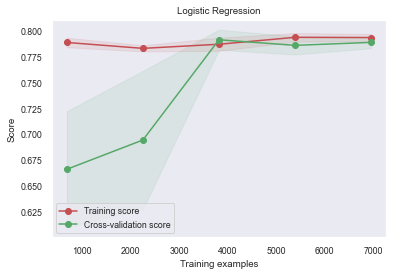

In [115]:
plot_learning_curve(LogReg_best , "Logistic Regression" , X_train , Y_train)

In [116]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(verbose=0, n_estimators=600)
cbc.fit(X_train, Y_train)

In [117]:
cross_val_score(cbc, X_train, y = Y_train, scoring = "accuracy", cv = 5).mean()

0.7897208890206466

In [118]:
# ============================================================
# Train on all Data
# ============================================================
GBC_all_data = GBC_best.fit(X_train , Y_train)
RFC_all_data = RFC_best.fit(X_train , Y_train)
ExtC_all_data = ExtC_best.fit(X_train , Y_train)
LogReg_all_data = LogReg_best.fit(X_train , Y_train)
cbc_all_data = cbc.fit(X_train , Y_train)

In [119]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
                                       ('gbc',GBC_best) , ("logreg" ,LogReg_best ) , ("catboost" , cbc)], voting='soft')

votingC = votingC.fit(X_train, Y_train)

In [120]:
predictions = pd.Series(votingC.predict(X_test).astype(bool), name="Transported")

results = pd.concat([Test_Id,predictions],axis=1)

results.to_csv("submission.csv",index=False)